In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
#define the Joukowski transformation

def j_trans(z,c):
    """
    Joukowski transfer:
    z_trans = z + (c**2)/z
    Parameters:
    
    z: the number you want to do Joukowski transfer, it can be a complex number or an array
    c: the constant in the Joukowski transfer
    ---
    Return:
    
    j_trans: the transfer result
    """
    j_trans = z + c**2/z
    return j_trans

In [3]:
def plot_transform_result(angle1,angle2,r_start,r_end):
    theta=numpy.linspace(angle1,angle2,10)
    r=numpy.linspace(r_start,r_end,10)
    R,THETA=numpy.meshgrid(r,theta)
    x=R*numpy.cos(THETA)
    y=R*numpy.sin(THETA)
    
    z=x+1j*y
    z_trans=j_trans(z,1)
    z_trans_real=z_trans.real
    z_trans_imag=z_trans.imag
    
    pyplot.figure(figsize=[5,5])
    pyplot.scatter(z_trans_real,z_trans_imag,color='b',s=5)
    pyplot.scatter(x,y,color='r',s=5)
    pyplot.xlim(-10,10)
    pyplot.ylim(-10,10)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


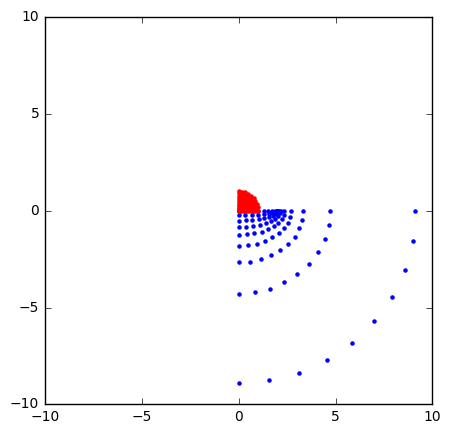

In [4]:
plot_transform_result(0,0.5*math.pi,0,1)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


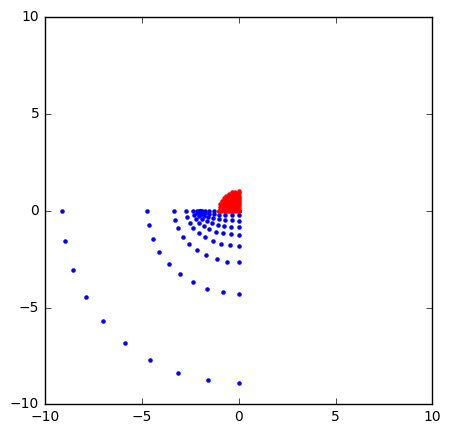

In [5]:
plot_transform_result(0.5*math.pi, math.pi,0,1)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


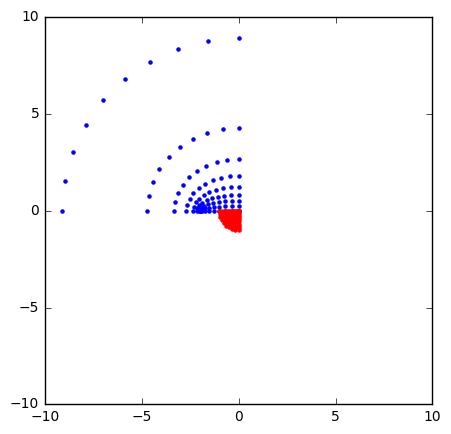

In [6]:
plot_transform_result(math.pi, 1.5*math.pi, 0, 1)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


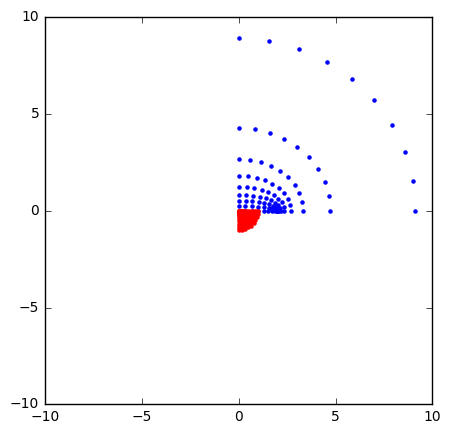

In [7]:
plot_transform_result(1.5*math.pi, 2*math.pi, 0, 1)

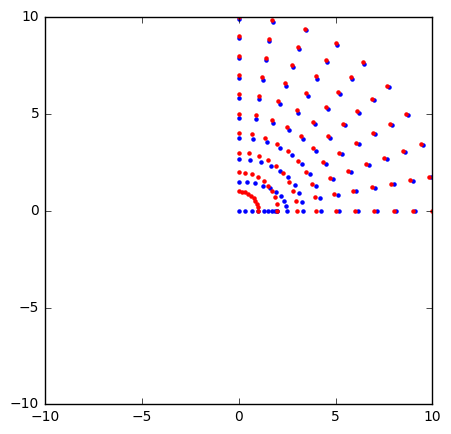

In [8]:
plot_transform_result(0,0.5*math.pi,1,10)

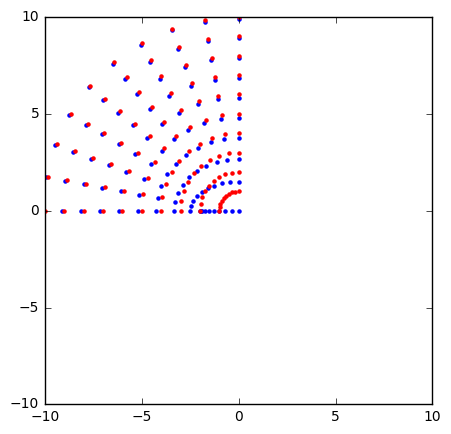

In [9]:
plot_transform_result(0.5*math.pi,math.pi,1,10)

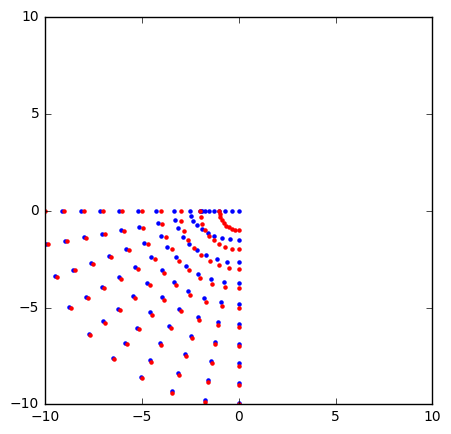

In [10]:
plot_transform_result(math.pi, 1.5*math.pi,1,10)

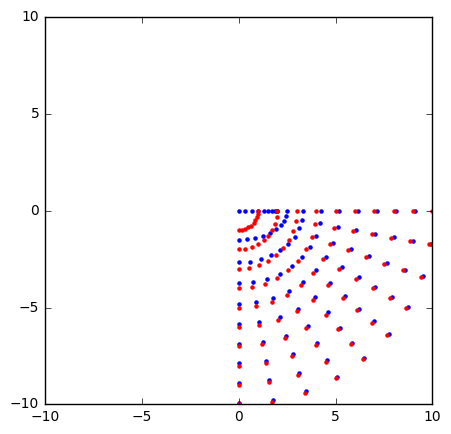

In [11]:
plot_transform_result(1.5*math.pi,2*math.pi,1,10)

we can see that when the distance between the point and the origin point is larger than 4, the influence of the transformation is much smaller, but when the radius is smaller than one,it has a significant influence:

1, the points with x value positive concentrates around 1, and the points with x value negetive concentrates at -1, not at 0 

2, the positive y became negetive, and negetive y became positive.



In [13]:
def generate_circle(x_c,y_c,r):
    theta=numpy.linspace(0,2*math.pi,20)
    x_circle=x_c+r*numpy.cos(theta)
    y_circle=y_c+r*numpy.sin(theta)
    return x_circle,y_circle

In [19]:
y_c=numpy.linspace(-3,3,11)
x_c=numpy.zeros_like(y_c)

x_coordinates=numpy.zeros([11,20])
y_coordinates=numpy.zeros([11,20])
for i in range(len(y_c)):
    x_coordinates[i], y_coordinates[i]=generate_circle(x_c[i],y_c[i],1.5)

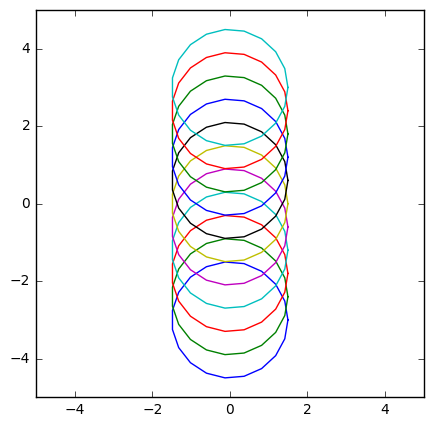

In [25]:
pyplot.figure(figsize=[5,5])
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
for i in range(11):    
    pyplot.plot(x_coordinates[i],y_coordinates[i])

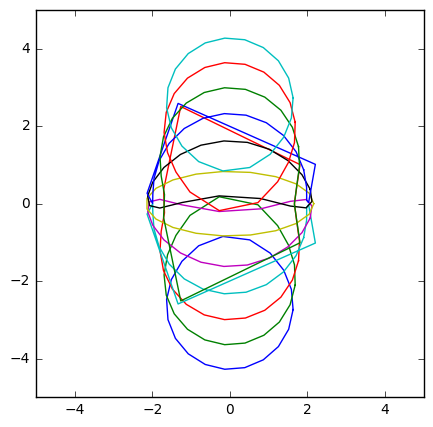

In [36]:
pyplot.figure(figsize=[5,5])
for i in range(11):
    z=x_coordinates[i]+1j*y_coordinates[i]
    z_trans=j_trans(z,1)
    pyplot.xlim(-5,5)
    pyplot.ylim(-5,5)
    pyplot.plot(z_trans.real,z_trans.imag)

In [62]:
def plot_circles_transforms(x_c,y_c,r):
    for i in range(len(y_c)):
        x_coordinates[i], y_coordinates[i]=generate_circle(x_c[i],y_c[i],r)
    
    
    pyplot.figure(figsize=[5,5])
    pyplot.xlim(-5,5)
    pyplot.ylim(-5,5)
    for i in range(11):    
        pyplot.plot(x_coordinates[i],y_coordinates[i])
    
    
    pyplot.figure(figsize=[5,5])
    pyplot.xlim(-5,5)
    pyplot.ylim(-5,5)
    
    for i in range(11):
        z=x_coordinates[i]+1j*y_coordinates[i]
        z_trans=j_trans(z,1)

        pyplot.plot(z_trans.real,z_trans.imag)

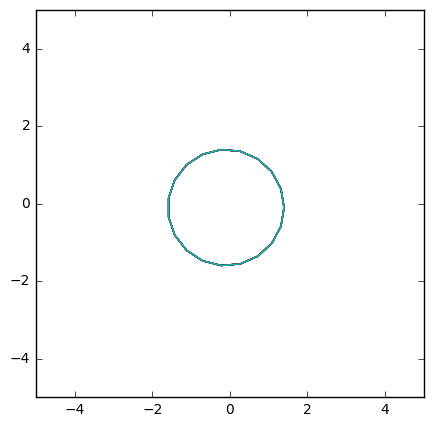

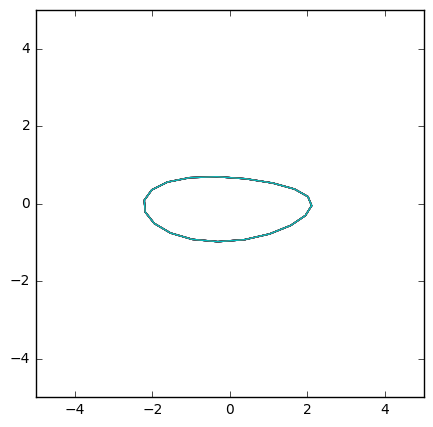

In [63]:
plot_circles_transforms(x_c,y_c,1.5)

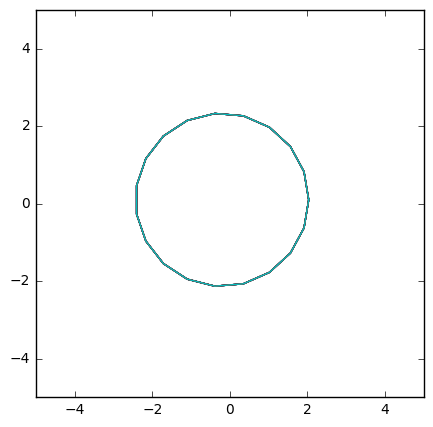

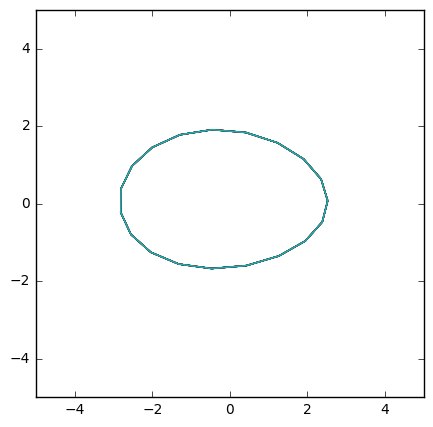

In [75]:
x_c=numpy.linspace(-0.2,-0.2,11)
y_c=numpy.linspace(0.1,0.1,11)
plot_circles_transforms(x_c,y_c,(5)**0.5)

In [84]:
aa=(1,2,3)
type(aa)

tuple

In [ ]:
class Joukowski_airfoil:
    def __init__(self,xc,yc,r):
        self.xc=xc
        self.yc=yc
        self.r=r
        
        #circle in z plane with 41 points
        theta=numpy.linspace(0,2*math.pi,41)
        